En este notebook, revisaremos algunos algoritmos para determinar las raíces de funciones

### Métodos Clásicos
* Bisección
* Método de Newton 
* Método de la Secante

### Bisección

En un **bracket** es un intervalo $[a,b]$ que contiene exactamente un cero o mínimos / máximos de interés

En el caso de un cero, el corchete debe satisfacer:
$$
    \text{sign}(f(a)) \neq \text{sign}(f(b)).
$$

En caso de un máximo o un mínimo necesitamos: 
$$
    \text{sign}(f'(a)) \neq \text{sign}(f'(b))
$$

**Teorema**:  

Sea
$$
    f(x) \in C[a,b] \quad \text{and} \quad \text{sign}(f(a)) \neq \text{sign}(f(b))
$$

entonces existe un número 
$$
    c \in (a,b) \quad \text{s.t.} \quad f(c) = 0.
$$

#### Algoritmo de la bisección

Dado un corchete $ [a, b] $ y una función $ f (x) $. El método consiste de tres sucesiones ${\displaystyle a_{n}\leq p_{n}\leq b_{n}\,}$ definidas por las siguientes relaciones:

\begin{equation}
p_{n} = \dfrac{a_n + b_n}{2}, \quad a_{n+1}={\begin{cases}a_{n}&{\mbox{si }}f(a_{n})\cdot f(p_{n})<0\\p_{n}&{\mbox{si }}f(a_{n})\cdot f(p_{n})>0\end{cases}} \quad  b_{n+1}={\begin{cases}b_{n}&{\mbox{si }}f(b_{n})\cdot f(p_{n})<0\\p_{n}&{\mbox{si }}f(b_{n})\cdot f(p_{n})>0\end{cases}}
\end{equation}


    
A continuación tenemos el psudocódigo para este método

**INPUT**: Función ```f```,

los extremos de intervalo ```a```, ```b```, 
       
una tolerancia ```TOL```, 
       
el número máximo de iteraciones ```NMAX```
       
**CONDITIONS**: a < b, 

ya sea ```f(a) < 0``` y ```f(b) > 0``` o ```f(a) > 0``` y ```f(b) < 0```
            
**OUTPUT**: valor que difiere de una raíz de $f (x) = 0$ en menos de ```TOL```

 
```N ← 1```

**while** ```N ≤ NMAX``` # acota las iteraciones para evitar un bucle infinito

```c ← (a + b)/2``` # nuevo punto medio
  
  **If** ```f(c) = 0 or (b – a)/2 < TOL``` **then** # encontramos la solución
  
  ```Output(c)```
    
  **Stop**
  
  **End If**
  
  ```N ← N + 1``` # incrementamos el contador
  **If** ```sign(f(c)) = sign(f(a))``` **then** ```a ← c``` **else** ```b ← c``` # nuevo intervalo
  
**EndWhile**
```Output("Method failed.") ``` # máximo número de pasos excedido

import sys
!{sys.executable} -m pip install scipy

In [1]:
from numpy import *
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def MyBisection(f, a, b,  TOL= 1e-5, NMAX= 1000):

# Initialize loop
    delta_x = b - a
    c = a + (delta_x/2.0)
    fa = f(a)
    fb = f(b)
    fc = f(c)

    # Loop until we reach the TOLERANCE or we take MAX_STEPS
    for step in range(1, NMAX + 1):
    

        # Check tolerance - Could also check the size of delta_x
        # We check this first as we have already initialized the values
        # in c and f_c
        if abs(fc) < TOL:
            break

        if sign(fa) != sign(fc):
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        delta_x = b - a
        c = a + (delta_x/2.0)
        fc = f(c)
        
    if step == NMAX:
        print("Reached maximum number of steps!")
    else:
        print("Success!")
        print("  x* = %s" % c)
        print("  f(x*) = %s" % f(c))
        print("  number of steps = %s" % step)

In [3]:
f = lambda x : x**5 - x**2 +1

In [4]:
MyBisection(f,-3,5)

Success!
  x* = -0.8087310791015625
  f(x*) = -1.7978674726748523e-06
  number of steps = 19


### Método de Newton (Newton-Raphson)
 
 Es una de las técnicas numéricas para resolver un problema de búsqueda de raíces $f(x) = 0$ más conocidas y poderosas
 
 Supongamos $f \in \mathcal{C}^2[a,b]$. Sea $\bar{x} \in [a,b]$ una aproximación de $p$ tal que $f'(\bar{x}) \neq 0$ y $p- \bar{x}$ es pequeño. Consideremos el primer polinomio de Taylor para $f(x)$ desarrollamos alrededor de $\bar{x}$.
 
 $$f(x) = f(\bar{x}) + (x-\bar{x})f'(\bar{x}) + \dfrac{(x- \bar{x})^2}{2} f''(\xi)$$
 
 donde $\xi \in [a,b]$. Dado $f(p) = 0$
 $$0 = f(\bar{x}) + (p -\bar{x})f'(\bar{x}) + \dfrac{(p - \bar{x})^2}{2} f''(\xi)$$
 
 puesto que supusimos $\vert p - \bar{x}\vert$ es muy pequeño, los términmos de orden cuadrados son despreciables.
 $$ 0 \approx f(\bar{x}) +  (p-\bar{x})f'(\bar{x})$$
 
 Despejando $p$
 
 $$p \approx \bar{x} - \dfrac{f(\bar{x})}{f'(\bar{x})}$$

A continuación tenemos el psudocódigo para este método

**INPUT**: Función ```f```,

aproximación inicial ```p0```, 
       
una tolerancia ```TOL```, 
       
el número máximo de iteraciones ```NMAX```
            
**OUTPUT**: valor que difiere de una raíz de $f (x) = 0$ en menos de ```TOL```

 
**step 1**```N ← 1```

**step 2** ```while N ≤ NMAX``` # acota las iteraciones para evitar un bucle infinito

> **step 3** ```p ← p0 - f(p0)/f'(p0)``` #

> **step 4** Si  ```| p - p0 | < TOL``` #  Entonces

> **OUTPUT** p

> **step 5**```i ← i +1```

> **step 6**```p0 ← p```

**step 7** ```OUTPUT```


In [5]:
def MyNewton(f, fp, x_k,  TOL= 1e-5, NMAX= 200):

    for n in range(1, NMAX + 1):
        x_k = x_k - f(x_k) / fp(x_k)
        if abs(f(x_k)) < TOL:
            break
        
    if n == NMAX:
        print("Reached maximum number of steps!")
    else:
        #print("Success!")
        #print("  x* = %s" % x_k)
        #print("  f(x*) = %s" % f(x_k))
        #print("  number of steps = %s" % n)
        return x_k

In [6]:
fp = lambda x : 5*x**4 - 2*x

In [7]:
MyNewton(f,fp,-3)

-0.8087306005219113

### Cuencas de atracción

Dado un punto $ x_0 $, ¿podemos determinar si Newton-Raphson converge?

Una *cuenca de atracción* $ X $ para los métodos de Newton se define como el conjunto tal que $ \forall x \in X $ Newton iterations converge. Desafortunadamente, esto está lejos de ser algo trivial para determinar e incluso para funciones simples pueden conducir a regiones que son fractales.

A continuación se presentan dos ecuaciones bastante simples que demuestran el problema:
1. $ f (x) = x ^ 3 - 1 $
2. La ecuación de Kepler $ \theta - e \sin \theta = M $

In [8]:
zeros(6).reshape((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [9]:
g = lambda x : x**3 - 1
gp = lambda x : 3*x**2

x0s =  arange(-2,2,0.002)

count = 0
z0s = zeros(len(x0s)*len(x0s))

for i in x0s:
    for j in x0s:
        
        x0 =  i + j*1j 
        #print(x0)
        z0 = MyNewton(g, gp, x0)
        z0s[count] = z0.real + z0.imag
        count +=1




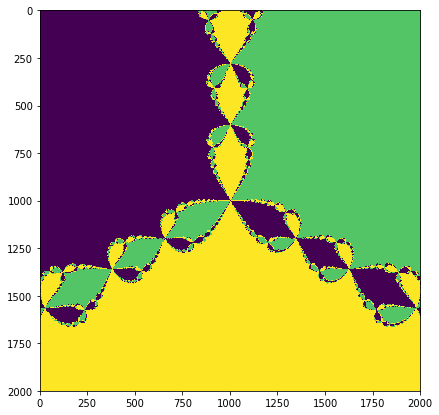

In [10]:
harvest = z0s.reshape((len(x0s), len(x0s)))


fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(harvest)
plt.show()

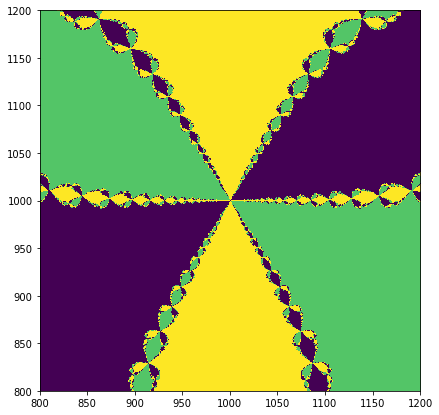

In [11]:
fig, ax = plt.subplots(figsize=(7, 7))
im = ax.imshow(harvest)
plt.xlim(800,1200)
plt.ylim(800,1200)
plt.show()

!pip3 install --upgrade
!pip3 install sympy 

In [12]:
from sympy import *

In [13]:
x ,y ,z = symbols('x y z')

In [15]:
type(x)

sympy.core.symbol.Symbol

In [24]:
fx = sin(x) 

In [25]:
fx

sin(x)

In [30]:
fxx=diff(fx,x,4)

In [40]:
fxx.subs(x,pi/2)

0

In [ ]:
from scipy import optimize

In [ ]:
optimize.newton(g, 1.5, fprime=lambda x: 3 * x**2)

In [ ]:
from sympy import *

In [ ]:
x = arange(-30.5, -29.5, 0.001)
y = arange(-17.5, -16.5, 0.001)


count = 0
zz0s = zeros(len(x)*len(y))
for i in x:
    for j in y:
        
        x0 =  i + j*1j 
        #z0 = optimize.newton(h, x0, fprime=lambda x: 1 - 0.083*cos(x))
        z0 = MyNewton(h, hp, x0,1e-5, 30)
        zz0s[count] = z0.real + z0.imag
        count +=1

In [ ]:
harvest = zz0s.reshape((len(x), len(y)))


fig, ax = plt.subplots()
im = ax.imshow(harvest)

plt.show()

### Método de la secante

Este método proporciona una solución a $f(x)=0$ dada aproximaciones inicales $p_0$ y $p_1$. El algoritmo se muestra a continuación

A continuación tenemos el psudocódigo para este método

**INPUT**: Función ```f```,

aproximación inicaales ```p0``` y ```p1```, 
       
una tolerancia ```TOL```, 
       
el número máximo de iteraciones ```NMAX```
            
**OUTPUT**: valor que difiere de una raíz de $f (x) = 0$ en menos de ```TOL```

 
**step 1**```N ← 1```
> ```q0 ← f(p0)```

> ```q1 ← f(p1)```


**step 2** ```while N ≤ NMAX``` hacer paso 3-6# acota las iteraciones para evitar un bucle infinito

> **step 3** ```p ← p1 - q1(p1 - p0))/(q1 - q0)``` #

> **step 4** Si  ```| p - p1 | < TOL``` #  Entonces

> **OUTPUT** p

> **step 5**```i ← i +1```

> **step 6**```p0 ← p1```, ```q0 ← q1```, ```p1 ← p0``` y ```q1 ← f(p)``` 

**step 7** ```OUTPUT```

